In [88]:
import IP

In [89]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


#Question1

#Assume that the grid elements are 1 × 1 mm squares. What is the sampling rate (in samples/mm) required to avoid aliasing?

Here the spatial period of grid is 2mm(Containing one element for black, and another for white), therefore its spatial frequency is 1/2mm = 0.5(samples/mm)
In order to avoid alising, we should sample at a rate twice its spatial frequency. Therefore, our sampling 
frequency is:    2×0.5(samples/mm)=1(samples/mm)

#Assume that the grid elements are 2 × 1 mm.What should be the sampling rate in each coordinate direction to avoid aliasing?

According to the Sampling theorem, if we want to avoid alising, we should sample at a rate twice its highest frequency.So in the first direction, the grid elements' frequency is: f1 = 1/4(mm)=0.25(samples/mm). So our sampling rate at the first direction is 2×f1 = 0.5(samples/mm) And in the second 
direction, the grid elements' frequency is: f2 = 1/2(mm)=0.5(samples/mm)
Therefore the sampling rate at second direction should be:
2×f2=1(samples/mm)

#What would be your answer to part (b) if you can use a single sampling frequency for both coordinate directions?


According to the Sampling theorem, if we want to avoid alising, we should sample at a rate twice its highest frequency.So in the first direction, the grid elements' frequency is: f1 = 1/4(mm)=0.25(samples/mm). And in the second 
direction, the grid elements' frequency is: f2 = 1/2(mm)=0.5(samples/mm)
      As f2 > f1. Therefore we should sample at:
2*f2=1(samples/mm)

# Quesiton 2

In [90]:
# Import the image to do the test
I = IP.data.checkerboard()
I = IP.rgb2gray(I)


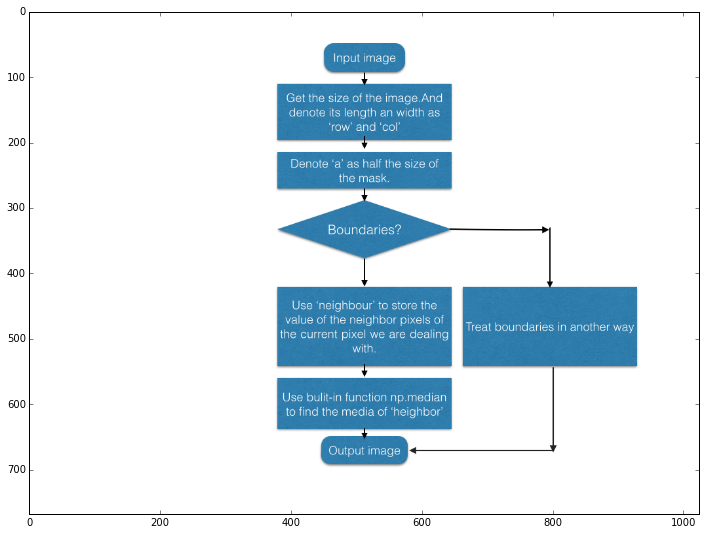

In [91]:
Flow_chart=imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW3/Flow_chart.001.jpg')
fig,ax1 = subplots(nrows=1, figsize=(12,17)) # It might be a little bit slow,plz be patient~~Thanks!
ax1.imshow(Flow_chart,aspect=1)


In [92]:
# Write our own median filter
# Input 3,7,15,21 to change the size of the mask 
def own_med_fil(Image,masksize):
    [row,col]=Image.shape
    a = (masksize-1)/2
    newImage = zeros([row,col])
    for x in arange(0,row,1):
        for y in arange(0,col,1):
            if y<a:
                newImage[x,y]=Image[x,y+1]
            elif x<a:
                newImage[x,y]=Image[x+1,y]
            elif y > col-a:
                newImage[x,y]=Image[x,y-1]
            elif x > row-a:
                newImage[x,y]=Image[x-1,y]
            else:
                neighbour = Image[x-a:x+a,y-a:y+a]
                newImage[x,y]= median(neighbour)  # Here the 'median' is imported from numpy!!Not the one from filter 
    return newImage
            

# Describe the problem at image boundaries when performing the median filtering. Describe how your algorithm in part (a) treats the boundaries.


The problem is, when performing filtering at the boundaries, some part of the mask just exceed 
the boundries of the image, and therefore the image after filting always shows all black or 
white at the boundaries. 

Below it's my solution procedure to deal with the problen at the boundary.
1. Before I filter the image, I first check whether the pixel I am dealing with is at the boundary.
   The 'boundary' here doesn't imply that its x or y coordinate equals zero. 
   It refers to those pixels that can't be treated by the mask like the pixels at the center.
   Often the width of these 'boundary'equals half the width of the mask.(Technically it equals
   to (width-1)/2 because the width is usually odd when we do median filter)
2. Then identity which boundary it is locating at. 
3. If the pixel is at the left boundary, its value equals to its next value on the right.
4. If the pixel is at the right boundary, its value equals to its next value on the left.
5. If the pixel is at the upper boundary, its value equals to its next value downward.
6. If the pixel is at the lower boundary, its value equals to its next value upward.

In [93]:
mask_3= own_med_fil(I,3)
mask_7= own_med_fil(I,7)
mask_15= own_med_fil(I,15)
mask_21= own_med_fil(I,21)

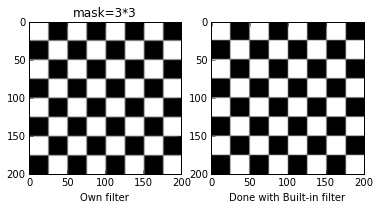

In [94]:
subplot(121);imshow(mask_3,cmap='gray');xlabel('Own filter');title('mask=3*3')
subplot(122);imshow(IP.med(I,ones([3,3])),cmap='gray');xlabel('Done with Built-in filter')
# 'IP.med'is the built in median filter

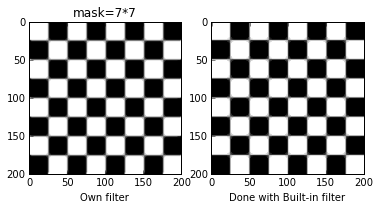

In [95]:
subplot(121);imshow(mask_7,cmap='gray');xlabel('Own filter');title('mask=7*7')
subplot(122);imshow(IP.med(I,ones([7,7])),cmap='gray');xlabel('Done with Built-in filter')

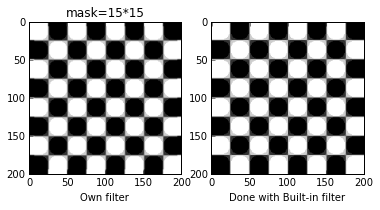

In [96]:
subplot(121);imshow(mask_15,cmap='gray');xlabel('Own filter');title('mask=15*15')
subplot(122);imshow(IP.med(I,ones([15,15])),cmap='gray');xlabel('Done with Built-in filter')

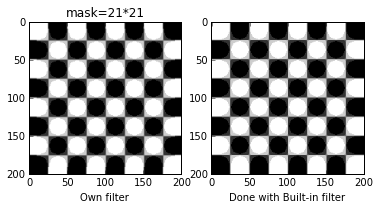

In [97]:
subplot(121);imshow(mask_21,cmap='gray');xlabel('Own filter');title('mask=21*21')
subplot(122);imshow(IP.med(I,ones([21,21])),cmap='gray');xlabel('Done with Built-in filter')

# Question 3

#Use an image of your choice to demonstrate the effect of repeatedly applying a 3 × 3 low-pass spatial filter to a digital image.

As we know, low-pass spatial filter is used for subducing or removing details and enhancing large features. 
Therefore, I think, if we repeatedly applying a 3×3 low-pass spatial filter, the image will become blurrer and 
blurrer. The detail of the image would not likely be identified. But if there is some noisy in the original 
filter, it might be smoothed out

Based on the features of the low-pass spatial filter, I choose the image below. The reason is, the mountain line in
this picture should be considered 'important'information. And the detail of each mountain is comparatively less
important. Besides, as the image is taken from above, so there is a great possibility that it is effected by 
so kind of noise. So I choose this image to apply our low-pass filter

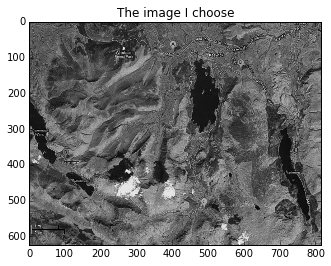

In [98]:
# Choose an image
Lowpass_Image=imread('/Users/Bato/Documents/Study/Courses_in_UR/Random Process/Satellite.jpg')
Lowpass_Image=IP.rgb2gray(Lowpass_Image)
imshow(Lowpass_Image,cmap='gray');title('The image I choose')

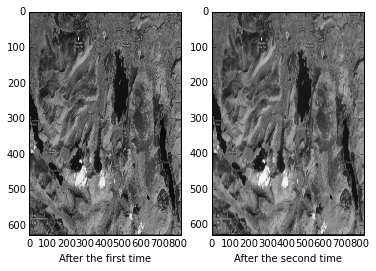

In [99]:
# Design the filter
k1 = IP.ones((3,3))
# Use filter for the first time
k2 = IP.filter2D(Lowpass_Image,k1);
subplot(121);xlabel('After the first time');imshow(k2,aspect='auto',cmap='gray')
# For the second time
k3 = IP.filter2D(k2,k1);
subplot(122);xlabel('After the second time');imshow(k3,aspect='auto',cmap='gray')


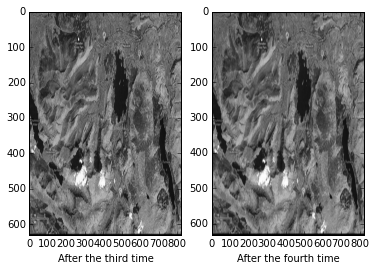

In [100]:
# Use filter for the third time
k4 = IP.filter2D(k3,k1)
subplot(121);xlabel('After the third time');imshow(k4,aspect='auto',cmap='gray')
# For the second time
k5 = IP.filter2D(k4,k1)
subplot(122);xlabel('After the fourth time');imshow(k5,aspect='auto',cmap='gray')

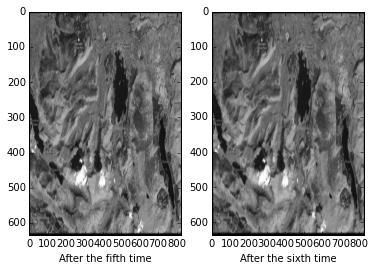

In [101]:
# Use filter for the third time
k6 = IP.filter2D(k5,k1)
subplot(121);xlabel('After the fifth time');imshow(k6,aspect='auto',cmap='gray')
# For the second time
k7 = IP.filter2D(k6,k1)
subplot(122);xlabel('After the sixth time');imshow(k7,aspect='auto',cmap='gray')

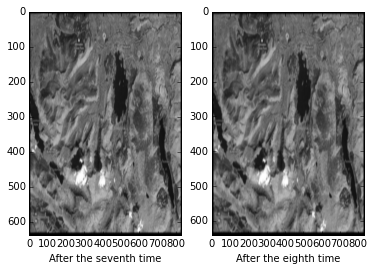

In [102]:
# Use filter for the third time
k8 = IP.filter2D(k7,k1)
subplot(121);xlabel('After the seventh time');imshow(k8,aspect='auto',cmap='gray')
# For the second time
k9 = IP.filter2D(k8,k1)
subplot(122);xlabel('After the eighth time');imshow(k9,aspect='auto',cmap='gray')

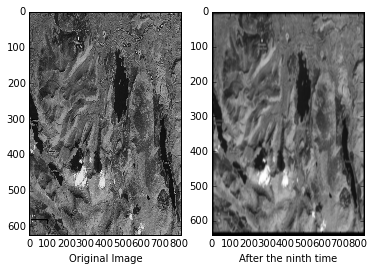

In [103]:
# After applying 9 times the low-pass filter to the image, we are going to compare it with the original one:
subplot(121);xlabel('Original Image');imshow(Lowpass_Image,aspect='auto',cmap='gray')
subplot(122);xlabel('After the ninth time');imshow(k9,aspect='auto',cmap='gray')

So after filtering, obvious the iamge becomes blurrer and blurer, and the small details of the detour of the mountain line has been remove. All left is the general shape of the mountain line. 

# Question 4

#Describe what a separable function is and give a few examples of separable func- tions. Explain the benefit(s) of dealing with separable functions in image process- ing.

Let's say if a function contains multiple variables. And if it can be expressed as multiple functions, and each function only contain one varible. This function is called 'saparable function'.



For example:
1. f(x,y)= (5x+6)(3y+2)=f(x)f(y),where f(x)=5x+6,f(y)=3y+2;
2. f(A,θ)=Acos(θ),where f(A)=A,f(θ)=cos(θ)



As images are made up of two or three demensional matrics, which make it impossible to be represent with single variable in function. If we can separate the multi-variable function into different varible function.It would be much faster and time-saving when we perform Fourier Transform or other kinds of transformation,which needs integration during the calculating proceess,on the function.

#Prove the following Fourier transform relation: F{rect(x)rect(y)} = sinc(fx)sinc(fx).

In [104]:
Prove=imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW3/sinc.jpeg')

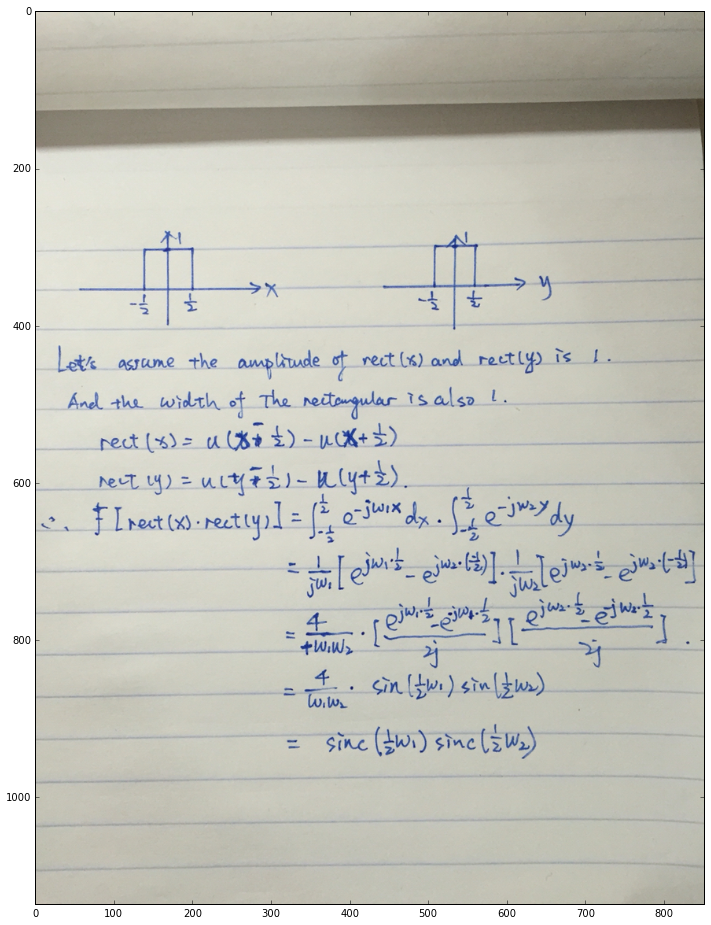

In [105]:
fig,ax2 = subplots(nrows=1,figsize=(12,17)) 
ax2.imshow(Prove,aspect=1)

#Prove the equation above using python

In [106]:
def rect(x):
    y = zeros(shape(x))
    y[abs(x)<=0.5]=1
    return y

In [134]:
# Now we are going to generate retangular signal
Fs1 = 100.0; Fs2 = 200        # Two different sampling rates
N = 1500      
Ts1 = 1/Fs1;Ts2 = 1/Fs2;     # sampling interval
t1 = np.arange(-1,1,Ts1);t2=np.arange(-1,1,Ts2) # time vector
x1 = rect(t1);x2 = rect(t2)
X1 = Ts1*IP.fft(x1,N)
X2 = Ts2*IP.fft(x2,N)

[-1, 1, 0, 2]

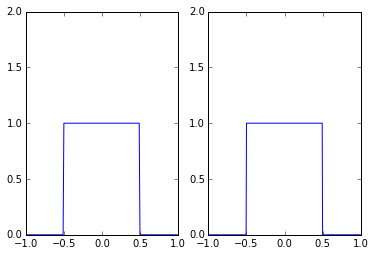

In [135]:
subplot(121);plot(t1,x1);axis([-1,1,0,2])
subplot(122);plot(t2,x2);axis([-1,1,0,2])

/Users/Bato/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/Bato/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


[-100, 100, 0, 1]

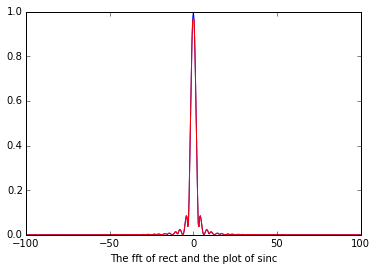

In [140]:
w1 = arange(-N/2,N/2)*(2*pi/N)*Fs1
w2 = arange(-N/2,N/2)*(2*pi/N)*Fs2
sinc1 = sin(w1/2)/(w1/2)                                  # Theoretical sinc function that we need
sinc2 = sin(w2/2)/(w2/2)
plot(w1,abs(IP.fftshift(X1*X2)),w1,abs(sinc1*sinc2),'r')  # Plot the theoretical one and the one we get from FFT
xlabel('The fft of rect and the plot of sinc')
axis([-100,100,0,1])

As we can see from the figure above, the red line and the blue line match well. Therefore we can say that the fourier transform of rect signal equals sinc function. 

#Describe the Gibbs phenomenon.

Gibb phenomenon describes the behavior of the discontinuous points in the sequence of Fourier partial sum. When we approach those discontinous points, we find that there will be a bump at those points,and that bump would increase the maximum of the partial sum. We call this phenomenon Gibb phenomenon.

"From the point of view of signal processing, the Gibbs phenomenon is the step response of a low-pass filter, and the oscillations are called ringing or ringing artifacts."--Wikipedia

And when the number of items being composed in the Fourier Series is large enough, the value of the bump is approximately 9% the value of the difference value at the discontinuous points. 